# Задание к лабораторной работе №8 по машинному обучению

линейная регрессия, полиномиаьная регрессия, регуляризация, логистическая регрессия

Датасет для задачи регрессии - load_diabetes

Датасет для задачи классификации - load_breast_cancer

1. Регрессия. Применить линейную (и модели с регуляризацией) и полиномиальную регрессию к датасету load_diabetes. Вывести метрики R2, MSE, MAE для двух моделей. Построить scatterplot predicted vs. true.
2. Классификация. Найти оптимальное значение параметра регуляризации $C$ с помощью LogisticRegressionCV – перебора параметров по сетке с последующей кросс-валидацией. Этот класс создан специально для логистической регрессии (для нее известны эффективные алгоритмы перебора параметров), для произвольной модели мы бы использовали GridSearchCV, RandomizedSearchCV. Построить график зависимости метрики ROC-AUC от параметра С.
3. Выбрать порог классификации для LogisticRegression на основе метрики  

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data = load_diabetes()
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target,test_size=0.3, random_state=42)

## Задача 1

In [4]:
from sklearn.linear_model import LinearRegression
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)

In [5]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_pred_linear)
mse = mean_squared_error(y_test, y_pred_linear)
mae = mean_absolute_error(y_test, y_pred_linear)

print(f"Линейная регрессия - R2: {r2}, MSE: {mse}, MAE: {mae}")

Линейная регрессия - R2: 0.4772897164322617, MSE: 2821.750981001311, MAE: 41.91937845679274


С регуляризацией

In [6]:
from sklearn.linear_model import Ridge
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)

In [7]:
r2 = r2_score(y_test, y_pred_ridge)
mse = mean_squared_error(y_test, y_pred_ridge)
mae = mean_absolute_error(y_test, y_pred_ridge)

print(f"Ridge - R2: {r2}, MSE: {mse}, MAE: {mae}")

Ridge - R2: 0.4233440269603015, MSE: 3112.9664151980814, MAE: 45.46352769933713


In [8]:
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, y_train)
y_pred_lasso = model_lasso.predict(X_test)

In [9]:
r2 = r2_score(y_test, y_pred_lasso)
mse = mean_squared_error(y_test, y_pred_lasso)
mae = mean_absolute_error(y_test, y_pred_lasso)

print(f"Lasso - R2: {r2}, MSE: {mse}, MAE: {mae}")

Lasso - R2: 0.4859194402036221, MSE: 2775.165076183445, MAE: 41.938631174436246


Полиномиальная регрессия

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [13]:
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(include_bias=False)),
    ('linear_regression', LinearRegression())
])

param_grid = {
    'poly_features__degree': range(2, 6)
}

grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

print("Лучшее значение степени полинома:", grid_search.best_params_['poly_features__degree'])
print("Лучшее значение MSE:", -grid_search.best_score_)

Лучшее значение степени полинома: 2
Лучшее значение MSE: 4480.702841527905


In [14]:
best_degree = grid_search.best_params_['poly_features__degree']
best_model = grid_search.best_estimator_
y_pred_best_poly = best_model.predict(X_test)

In [15]:
r2_best = r2_score(y_test, y_pred_best_poly)
mse_best = mean_squared_error(y_test, y_pred_best_poly)
mae_best = mean_absolute_error(y_test, y_pred_best_poly)

print(f"Полиномиальная регрессия) - R2: {r2_best}, MSE: {mse_best}, MAE: {mae_best}")

Полиномиальная регрессия) - R2: 0.41297706916205823, MSE: 3168.9304439474818, MAE: 44.22139588944842


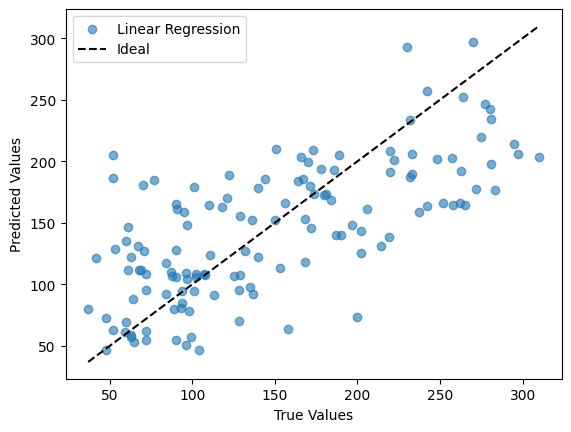

In [16]:
plt.scatter(y_test, y_pred_linear, label='Linear Regression', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label='Ideal')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

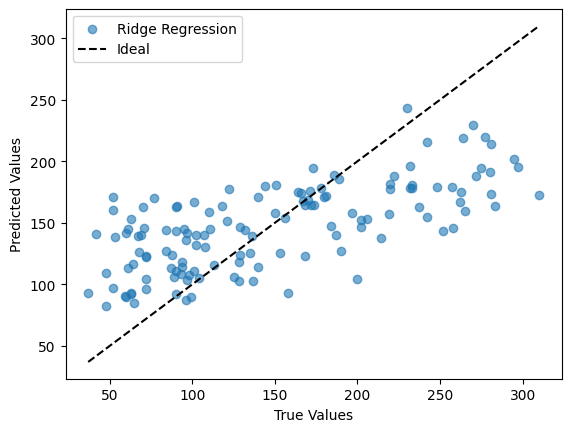

In [17]:
plt.scatter(y_test, y_pred_ridge, label='Ridge Regression', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label='Ideal')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

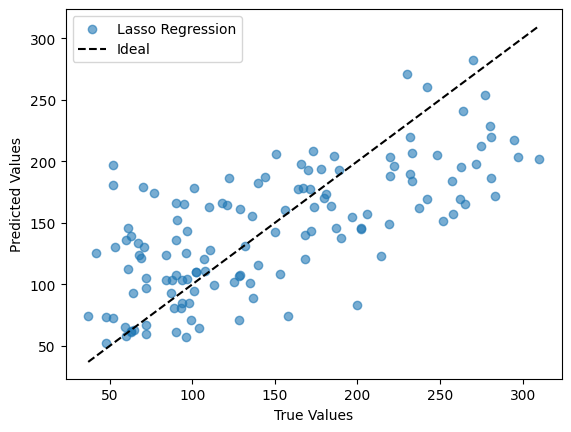

In [18]:
plt.scatter(y_test, y_pred_lasso, label='Lasso Regression', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label='Ideal')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

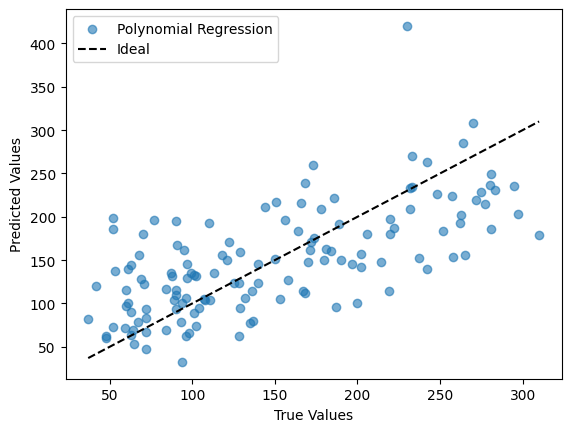

In [19]:
plt.scatter(y_test, y_pred_best_poly, label='Polynomial Regression', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label='Ideal')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

## Выводы по результатам моделей

### 1. Линейная регрессия:
- **R^2 = 0.477**: Модель объясняет 47.7% дисперсии целевой переменной. Это означает, что около половины изменчивости данных удается объяснить линейной зависимостью.
- **MSE = 2821.75**: Среднеквадратичная ошибка относительно невелика, что указывает на сбалансированность модели.
- **MAE = 41.92**: Средняя абсолютная ошибка равна 41.92, что также указывает на достаточно приемлемую точность.

**Заключение:** Линейная регрессия показывает адекватные результаты, но есть потенциал для улучшения, так как модель объясняет только 47% данных.

### 2. Ridge (регрессия с L2-регуляризацией):
- **R^2 = 0.423**: Модель с регуляризацией объясняет немного меньше дисперсии, чем линейная регрессия (на 5% хуже).
- **MSE = 3112.97**: Среднеквадратичная ошибка выше, чем у линейной регрессии, что указывает на менее точные предсказания.
- **MAE = 45.46**: Средняя абсолютная ошибка больше, чем у линейной регрессии.

**Заключение:** Ridge не улучшила качество модели и даже ухудшила результаты по сравнению с линейной регрессией. Это может говорить о том, что в данном наборе данных нет явной мультиколлинеарности, и регуляризация не дала дополнительного преимущества.

### 3. Lasso (регрессия с L1-регуляризацией):
- **R^2 = 0.486**: Lasso показала наилучший коэффициент среди всех моделей, что говорит о лучшем качестве предсказаний.
- **MSE = 2775.17**: Среднеквадратичная ошибка ниже, чем у линейной регрессии, что подтверждает улучшение точности.
- **MAE = 41.94**: Средняя абсолютная ошибка схожа с линейной регрессией, но модель при этом еще и упрощает данные за счет обнуления ненужных коэффициентов.

**Заключение:** Lasso оказалась лучшей моделью среди линейных подходов благодаря способности исключать ненужные признаки.


### 4. Полиномиальная регрессия (степень 2):
- **R^2 = 0.413**: Полиномиальная регрессия объясняет чуть больше 41% дисперсии, что хуже, чем у линейных моделей.
- **MSE = 3168.93**: Среднеквадратичная ошибка также больше, чем у линейных моделей, что говорит о менее точных предсказаниях.
- **MAE = 44.22**: Средняя абсолютная ошибка больше, чем у линейной регрессии и Lasso.

**Заключение:** Несмотря на использование полиномиальных признаков, полиномиальная регрессия не улучшила результаты, возможно, из-за ограниченности объема данных или их линейной структуры.

### Итог:
- **Лучшая модель**: **Lasso**  показала лучшие результаты по всем метрикам. Она обеспечила наибольшее значение R^2 и низкие ошибки.
- **Полиномиальная регрессия** не улучшила результаты и даже показала худшие метрики, что свидетельствует о том, что в данной задаче линейная зависимость является более подходящей моделью.


## Задача 2,3

In [20]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc

In [21]:
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
Cs = np.logspace(-4, 4, 20)

roc_auc_scores = []
for C in Cs:
    model = LogisticRegressionCV(Cs=[C], cv=5, max_iter=10000, solver='liblinear', scoring='roc_auc')
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred)
    roc_auc_scores.append(auc)

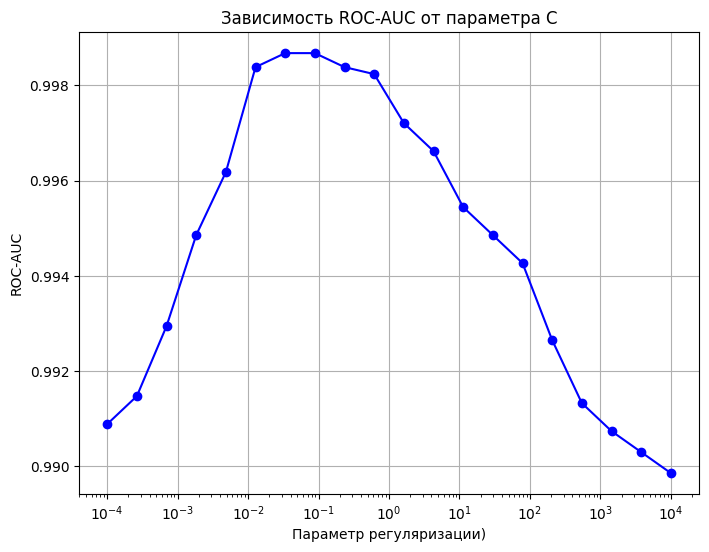

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(Cs, roc_auc_scores, marker='o', linestyle='-', color='b')
plt.xscale('log')
plt.xlabel('Параметр регуляризации)')
plt.ylabel('ROC-AUC')
plt.title('Зависимость ROC-AUC от параметра C')
plt.grid(True)
plt.show()

In [24]:
max_auc_index = np.argmax(roc_auc_scores)
best_C = Cs[max_auc_index]
best_auc = roc_auc_scores[max_auc_index]

print(f"Лучший параметр C: {best_C}")
print(f"Максимальный ROC-AUC: {best_auc}")

Лучший параметр C: 0.03359818286283781
Максимальный ROC-AUC: 0.9986772486772487


In [25]:
best_model = LogisticRegressionCV(Cs=[best_C], cv=5, max_iter=10000, solver='liblinear', scoring='roc_auc')
best_model.fit(X_train, y_train)

y_pred_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

optimal_threshold_index = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_threshold_index]

print(f"Оптимальный порог классификации: {optimal_threshold:.2f}")

Оптимальный порог классификации: 0.48


In [26]:
y_pred_class = (y_pred_proba >= optimal_threshold).astype(int)

In [27]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

report = classification_report(y_test, y_pred_class)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        63
           1       0.99      1.00      1.00       108

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



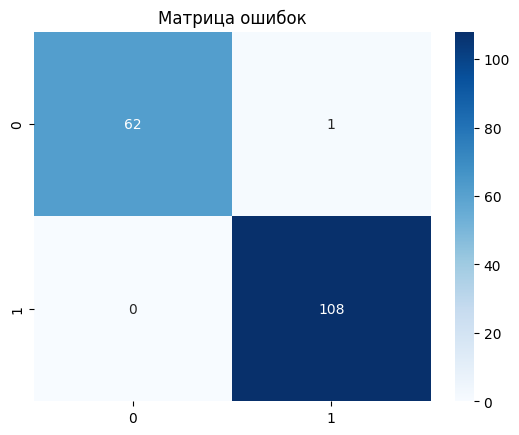

In [28]:
conf_matrix = confusion_matrix(y_test, y_pred_class)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Матрица ошибок')
plt.show()

## Вывод

После выполнения перебора параметра регуляризации \( C \) для логистической регрессии с использованием кросс-валидации, был найден оптимальный параметр \( C \) с максимальным значением ROC-AUC:

- **Лучший параметр C**: 0.0336
- **Максимальный ROC-AUC**: 0.9987

Это означает, что модель с этим значением регуляризации наиболее точно предсказывает вероятность принадлежности образца к положительному классу (в данном случае — злокачественной опухоли).

### Матрица ошибок:
 62,  1  
 0, 108

### Основные метрики классификации:
- **Precision**: 0.98 для злокачественных и 0.99 для доброкачественных опухолей.
- **Recall**: 0.98 для злокачественных и 0.99 для доброкачественных опухолей.
- **F1**: 0.98 для злокачественных и 0.99 для доброкачественных опухолей.

### Параметр регуляризации \( C \):

Параметр регуляризации C  в логистической регрессии контролирует степень наказания за сложность модели. Меньшие значения C приводят к большему регуляризационному эффекту, что помогает избежать переобучения, но может привести к ухудшению точности. Напротив, большие значения C  уменьшают регуляризацию, что позволяет модели лучше подстраиваться под обучающие данные, но может привести к переобучению.

В данном случае оптимальное значение C было найдено на уровне 0.0336, что дает высокую точность модели при хорошем балансе между переобучением и недообучением.